In [18]:
library(dplyr)
install.packages("ggplot2")
library(ggplot2)
install.packages("ggmap")
library(ggmap)

files <- list.files("Ecuador/GACETA-ZIKA/data")
all <- rep(list(NA),length(files))

for(i in 1:length(files)){
  f <- read.csv(paste("Ecuador/GACETA-ZIKA/data/",files[i],sep=""),stringsAsFactors = F)
  all[[i]] <- f
}
Ecuador_All<-as.data.frame(do.call(rbind,all))
Ecuador_manabi<-Ecuador_All[substr(Ecuador_All$location,1, 15)=="Ecuador-Manabi-",]


The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpxNd8th/downloaded_packages

The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpxNd8th/downloaded_packages


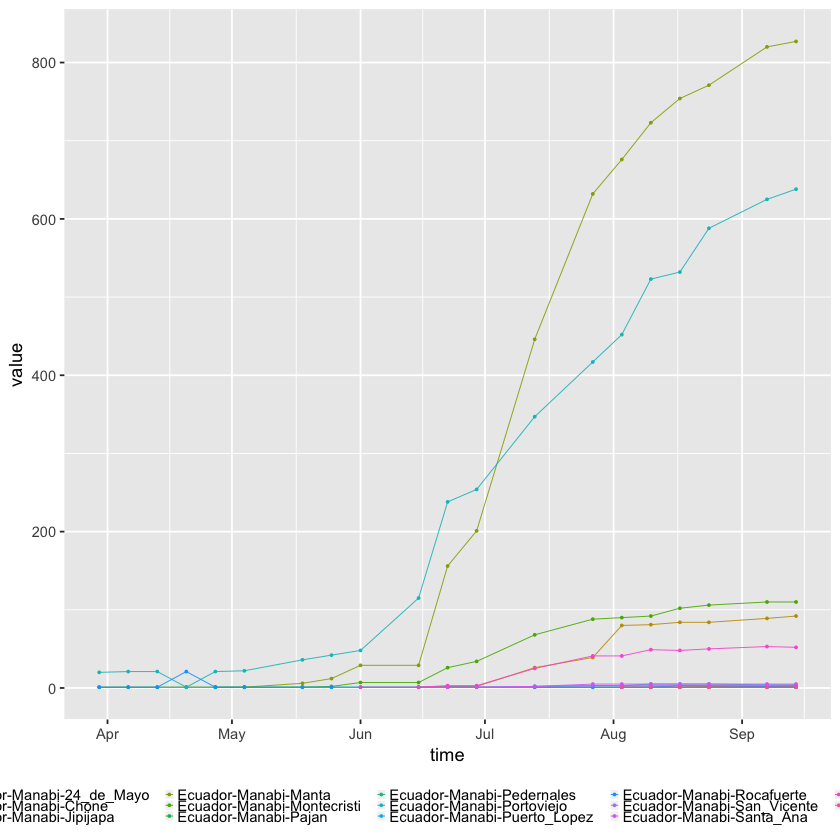

In [19]:
Ecuador_manabi$time <- as.Date(Ecuador_manabi$"report_date")

ggplot(data=subset(Ecuador_manabi,data_field_code %in% c("EC0003"))
             ,aes(x=time,y=value)) +
    geom_line(aes(colour=location),size=.25) + 
    geom_point(aes(colour=location),size=.4) +     theme(legend.key.size = unit(.2, "cm"),legend.position = 'bottom')

In [5]:
Ecuador_manabi$location2 <- sub("Ecuador-","",Ecuador_manabi$location)
geo <- geocode(Ecuador_manabi$location2)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Manta&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Pedernales&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Portoviejo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Rocafuerte&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Manta&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Portoviejo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Manta&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Pedernales&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabi-Portoviejo&sensor=false
Information from

In [11]:
install.packages("geosphere")
library(geosphere)
install.packages("Imap")
library(Imap)


The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpxNd8th/downloaded_packages


Loading required package: sp



The downloaded binary packages are in
	/var/folders/b6/mw45sqx10l3gg8_54l758k780000gn/T//RtmpxNd8th/downloaded_packages


In [23]:
Ecuador_manabi$long <- geo[,1]
Ecuador_manabi$lat <- geo[,2]
Ecuador_manabi$Earth_long<-rep(-79.94,222)
Ecuador_manabi$Earth_lat<-rep(.371,222)
Ecuador_manabi$distance<-gdist(lon.1 =Ecuador_manabi$long , lat.1 = Ecuador_manabi$lat, 
                               lon.2 = Ecuador_manabi$Earth_long, lat.2 = Ecuador_manabi$Earth_lat, units="miles")


Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”Warning message in while (abs(lamda - lamda.old) > 1e-11) {:
“the condition has length > 1 and only the first element will be used”

In [25]:
Ecuador_manabi$location2 <- sub("Ecuador-","",Ecuador_manabi$location)
Ecuador_manabiNew <- data.frame(Ecuador_manabi,population=rep(0,222))
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Manta",]$population<-192322
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Pedernales",]$population<-303682
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Rocafuerte",]$population<-29321
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Montecristi",]$population<-43400
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Sucre",]$population<-52158
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Jipijapa",]$population<-65796
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Santa_Ana",]$population<-45287
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-San_Vicente",]$population<-19116
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-24_de_Mayo",]$population<-28294
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Puerto_Lopez",]$population<-16626
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Pajan",]$population<-35952
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Tosagua",]$population<-33922
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Chone",]$population<-117634
Ecuador_manabiNew[Ecuador_manabi$location2=="Manabi-Portoviejo",]$population<-303682
head(Ecuador_manabiNew)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit,time,long,lat,Earth_long,Earth_lat,distance,location2,population
27,2016-03-30,Ecuador-Manabi-Manta,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,1,cases,2016-03-30,-80.70891,-0.9676533,-79.94,0.371,106.24549,Manabi-Manta,192322
28,2016-03-30,Ecuador-Manabi-Pedernales,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,1,cases,2016-03-30,-80.05139,0.0731181,-79.94,0.371,21.86908,Manabi-Pedernales,303682
29,2016-03-30,Ecuador-Manabi-Portoviejo,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,20,cases,2016-03-30,-80.45249,-1.0547230,-79.94,0.371,104.17463,Manabi-Portoviejo,303682
30,2016-03-30,Ecuador-Manabi-Rocafuerte,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,1,cases,2016-03-30,-80.45212,-0.9237111,-79.94,0.371,95.74993,Manabi-Rocafuerte,29321
40,2016-03-30,Ecuador-Manabi-Manta,county,total_zika_confirmed_imported,EC0004,NA,NA,1,cases,2016-03-30,-80.70891,-0.9676533,-79.94,0.371,106.24549,Manabi-Manta,192322
41,2016-03-30,Ecuador-Manabi-Portoviejo,county,total_zika_confirmed_imported,EC0004,NA,NA,1,cases,2016-03-30,-80.45249,-1.0547230,-79.94,0.371,104.17463,Manabi-Portoviejo,303682


In [50]:
lm<-lm(value~distance+population,data=subset(Ecuador_manabiNew,data_field_code %in% c("EC0003")))
summary(lm)
lm5<-lm(log(value)~log(distance),data=subset(Ecuador_manabiNew,data_field_code %in% c("EC0003")))
summary(lm5)


Call:
lm(formula = value ~ distance + population, data = subset(Ecuador_manabiNew, 
    data_field_code %in% c("EC0003")))

Residuals:
    Min      1Q  Median      3Q     Max 
-262.24  -61.86  -21.31   39.22  660.44 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.715e+02  5.413e+01  -5.015 1.35e-06 ***
distance     2.468e+00  4.478e-01   5.511 1.34e-07 ***
population   9.141e-04  1.262e-04   7.244 1.55e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 159.1 on 166 degrees of freedom
Multiple R-squared:  0.2545,	Adjusted R-squared:  0.2455 
F-statistic: 28.34 on 2 and 166 DF,  p-value: 2.58e-11



Call:
lm(formula = log(value) ~ log(distance), data = subset(Ecuador_manabiNew, 
    data_field_code %in% c("EC0003")))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5795 -1.8121 -0.5578  1.4131  4.5175 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.8870     1.3393  -3.649 0.000352 ***
log(distance)   1.5190     0.2977   5.102 9.05e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.055 on 167 degrees of freedom
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.1297 
F-statistic: 26.03 on 1 and 167 DF,  p-value: 9.055e-07


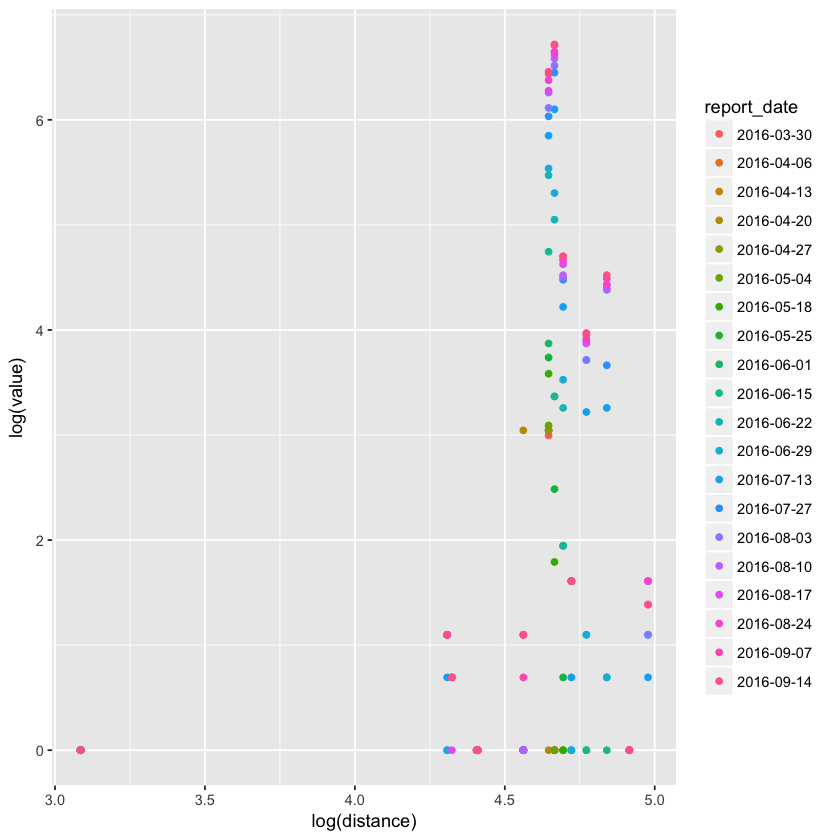

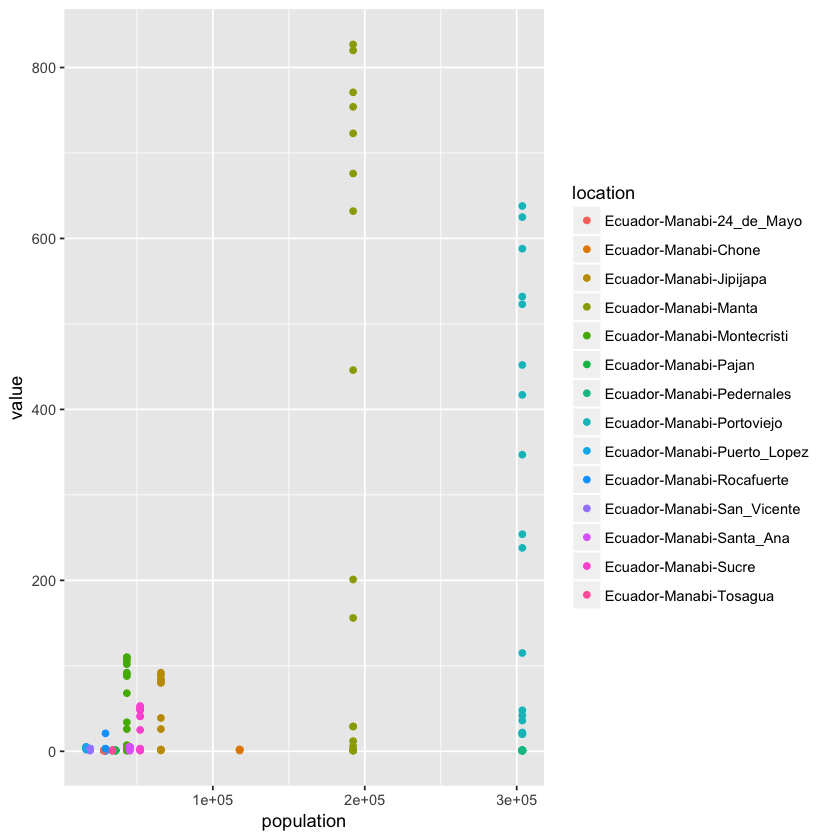

In [52]:
#plot(Ecuador_manabiNew$distance,Ecuador_manabiNew$value)
#plot(Ecuador_manabiNew$population,Ecuador_manabiNew$value)
ggplot(data=subset(Ecuador_manabiNew,data_field_code %in% c("EC0003")),aes(x=(distance),y=(value),color=report_date))+geom_point()
ggplot(data=subset(Ecuador_manabiNew,data_field_code %in% c("EC0003")),aes(x=population,y=value,color=location))+geom_point()

In [40]:
unique(Ecuador_manabiNew$report_date)
Ecuador_manabi9.14<-subset(Ecuador_manabiNew,report_date=="2016-09-14")
Ecuador_manabi3.30<-subset(Ecuador_manabiNew,report_date=="2016-03-30")

[1] "2016-03-30" "2016-04-06" "2016-04-13" "2016-04-20" "2016-04-27"
 [6] "2016-05-04" "2016-05-18" "2016-05-25" "2016-06-01" "2016-06-15"
[11] "2016-06-22" "2016-06-29" "2016-07-13" "2016-07-27" "2016-08-03"
[16] "2016-08-10" "2016-08-17" "2016-08-24" "2016-09-07" "2016-09-14"

In [42]:
lm1<-lm(value~distance+population,data=subset(Ecuador_manabi9.14,data_field_code %in% c("EC0003")))
summary(lm1)
lm2<-lm(value~distance+population,data=subset(Ecuador_manabi3.30,data_field_code %in% c("EC0003")))
summary(lm2)


Call:
lm(formula = value ~ distance + population, data = subset(Ecuador_manabi9.14, 
    data_field_code %in% c("EC0003")))

Residuals:
    Min      1Q  Median      3Q     Max 
-249.15  -89.29  -20.74   72.51  451.20 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.142e+02  2.216e+02  -2.321  0.04052 * 
distance     4.394e+00  1.871e+00   2.348  0.03863 * 
population   2.201e-03  5.792e-04   3.799  0.00295 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 186.4 on 11 degrees of freedom
Multiple R-squared:  0.5745,	Adjusted R-squared:  0.4971 
F-statistic: 7.425 on 2 and 11 DF,  p-value: 0.009103



Call:
lm(formula = value ~ distance + population, data = subset(Ecuador_manabi3.30, 
    data_field_code %in% c("EC0003")))

Residuals:
     27      28      29      30 
-7.8185 -0.5215  5.1666  3.1734 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.933e+01  1.983e+01  -0.975    0.508
distance     1.617e-01  1.556e-01   1.040    0.488
population   5.702e-05  4.840e-05   1.178    0.448

Residual standard error: 9.908 on 1 degrees of freedom
Multiple R-squared:  0.6374,	Adjusted R-squared:  -0.08771 
F-statistic: 0.879 on 2 and 1 DF,  p-value: 0.6021


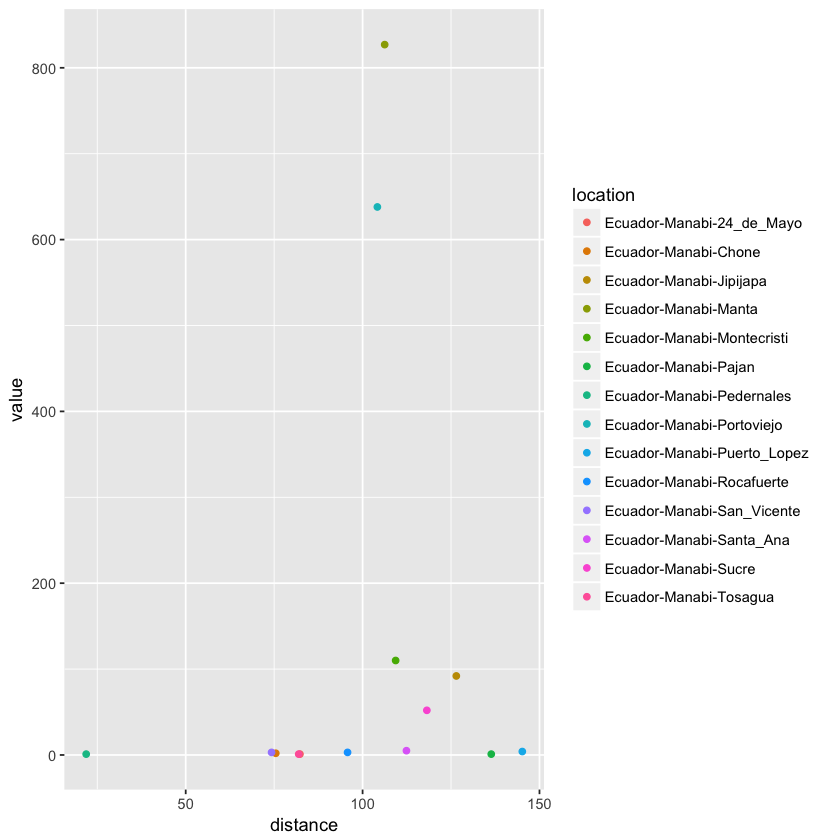

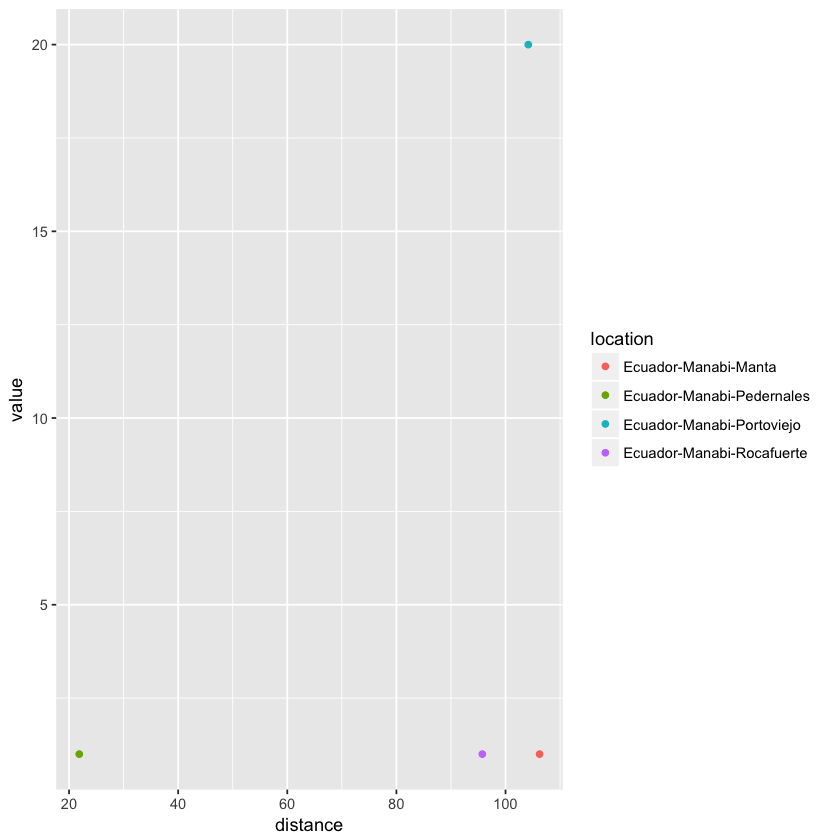

In [43]:
ggplot(data=subset(Ecuador_manabi9.14,data_field_code %in% c("EC0003")),aes(x=distance,y=value,color=location))+geom_point()
ggplot(data=subset(Ecuador_manabi3.30,data_field_code %in% c("EC0003")),aes(x=distance,y=value,color=location))+geom_point()

In [44]:
Ecuador_manabiNew2 <- data.frame(Ecuador_manabiNew,week=rep(0,222))
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-03-30",]$week<-1
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-04-06",]$week<-2
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-04-13",]$week<-3
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-04-20",]$week<-4
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-04-27",]$week<-5
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-05-04",]$week<-6
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-05-18",]$week<-7
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-05-25",]$week<-8
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-06-01",]$week<-9
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-06-15",]$week<-10
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-06-22",]$week<-11
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-06-29",]$week<-12
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-07-13",]$week<-13
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-07-27",]$week<-14
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-08-03",]$week<-15
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-08-10",]$week<-16
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-08-17",]$week<-17
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-08-24",]$week<-18
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-09-07",]$week<-19
Ecuador_manabiNew2[Ecuador_manabi$report_date=="2016-09-14",]$week<-20
head(Ecuador_manabiNew2)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit,time,long,lat,Earth_long,Earth_lat,distance,location2,population,week
27,2016-03-30,Ecuador-Manabi-Manta,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,1,cases,2016-03-30,-80.70891,-0.9676533,-79.94,0.371,106.24549,Manabi-Manta,192322,1
28,2016-03-30,Ecuador-Manabi-Pedernales,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,1,cases,2016-03-30,-80.05139,0.0731181,-79.94,0.371,21.86908,Manabi-Pedernales,303682,1
29,2016-03-30,Ecuador-Manabi-Portoviejo,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,20,cases,2016-03-30,-80.45249,-1.0547230,-79.94,0.371,104.17463,Manabi-Portoviejo,303682,1
30,2016-03-30,Ecuador-Manabi-Rocafuerte,county,total_zika_confirmed_autochthonous,EC0003,NA,NA,1,cases,2016-03-30,-80.45212,-0.9237111,-79.94,0.371,95.74993,Manabi-Rocafuerte,29321,1
40,2016-03-30,Ecuador-Manabi-Manta,county,total_zika_confirmed_imported,EC0004,NA,NA,1,cases,2016-03-30,-80.70891,-0.9676533,-79.94,0.371,106.24549,Manabi-Manta,192322,1
41,2016-03-30,Ecuador-Manabi-Portoviejo,county,total_zika_confirmed_imported,EC0004,NA,NA,1,cases,2016-03-30,-80.45249,-1.0547230,-79.94,0.371,104.17463,Manabi-Portoviejo,303682,1


In [45]:
lm3<-lm(value~distance+population+week,data=subset(Ecuador_manabiNew2,data_field_code %in% c("EC0003")))
summary(lm3)



Call:
lm(formula = value ~ distance + population + week, data = subset(Ecuador_manabiNew2, 
    data_field_code %in% c("EC0003")))

Residuals:
    Min      1Q  Median      3Q     Max 
-197.65  -87.65  -25.71   42.28  557.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.734e+02  5.861e+01  -8.076 1.33e-13 ***
distance     2.459e+00  4.041e-01   6.084 7.90e-09 ***
population   1.120e-03  1.185e-04   9.445  < 2e-16 ***
week         1.366e+01  2.191e+00   6.233 3.69e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.6 on 165 degrees of freedom
Multiple R-squared:  0.3966,	Adjusted R-squared:  0.3856 
F-statistic: 36.15 on 3 and 165 DF,  p-value: < 2.2e-16
